In [1]:
import json, pathlib, random, time
from collections import defaultdict
import numpy as np
import pandas as pd
import multiprocessing as mp

from environment import Env, validate_against_hint, load_word_lists, construct_word_df


In [2]:
df = construct_word_df(*load_word_lists())

In [3]:
#https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count


# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

#plt.ion()


In [4]:
#Get number of actions from gym action space
#n_actions = env.action_space.n
n_action_features = 5
n_state_features = 9
n_input_features = n_action_features + n_state_features


def plot_values(vals, axes=['duration', 'episode']):
    plt.figure(2)
    plt.clf()
    plt.title('Training...')
    plt.xlabel(axes[1])
    plt.ylabel(axes[0])
    plt.plot(np.array(vals))
    # Take 20 episode averages and plot them too
    window_width = 20
    if len(vals) >= window_width:
        cumsum_vec = np.cumsum(np.insert(vals, 0, 0)) 
        ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
        plt.plot(np.insert(ma_vec, 0, [None]*int(window_width/2)))

    plt.pause(0.001)  # pause a bit so that plots are updated
    #if is_ipython:
    #    display.clear_output(wait=True)
    #    display.display(plt.gcf())
    
def plot_all(episode_durations, episode_rewards, losses, epsilons, gammas):
    plot_values(episode_durations, axes=['duration', 'episode'])
    plot_values(episode_rewards, axes=['reward', 'episode'])
    if losses: plot_values(losses, axes=['loss', 'step'])
    if epsilons: plot_values(epsilons, axes=['epsilon', 'step'])
    if gammas: plot_values(gammas, axes=['gamma', 'step'])
    #plt.ioff()
    plt.show()

In [5]:

class TrainConfig():
    def __init__(self, train_interval=128, batch_size=128, clear_memory=False, lr=0.01):
        self.train_interval = train_interval
        self.batch_size = batch_size
        self.clear_memory = clear_memory
        self.lr = lr
        
class ValueConfig():
    def __init__(self, name='reward', gamma=[0.9, 0.05, 200]):
        self.name = name
        self.gamma = gamma
        
class ModelConfig():
    def __init__(self, name='naive', startword=None, target_list_only=None):
        self.name = name
        self.startword = startword
        self.target_list_only = target_list_only

In [6]:
#https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
def run_experiment(model=ModelConfig(name='naive', startword=None, target_list_only=False),
                   num_episodes=128,
                   eps=[0.9, 0.05, 200],
                   value_function=ValueConfig(name='reward',gamma=[0.0, 1.0, 200]),
                   training=TrainConfig(clear_memory=False, batch_size=128, train_interval=128)):
    #torch.manual_seed(0)
    random.seed(0)
    np.random.seed(0)
    env = Env(df)
    #memory = ReplayMemory(10000)
    
    steps_done = 0
    last_training = 0
    losses = []
    episode_rewards = []
    episode_durations = []
    epsilons = []
    gammas = []
    
    
    for i_episode in range(num_episodes):
        # Initialize the environment and state
        env.reset()
        print(f'=========================episode {i_episode} {env.target}======================')

        episode_memory = []
        guesses = []
        for t in count():
            steps_done += 1
            # Select and perform an action
            #print(state, actions)
            
            
            #MODEL
            if t == 0 and model.startword:
                chosen_word = model.startword
            else:
                chosen_word = env.sample_word_matching_current_history(env.df)
            #/MODEL
            
            
            guesses.append(chosen_word)
            print(f'------guess {t} {guesses[-1]} -------')
            history, reward, done = env.step(chosen_word)
            episode_memory.append(reward)
                       
            print(f'reward {reward} done {done} ')
            
            if done:
                episode_durations.append(t + 1)
                episode_reward = sum(episode_memory)
                print(f'episode {i_episode} finished.  reward {t + 1} {episode_reward} {steps_done}')
                episode_rewards.append(episode_reward)
                break

    print('Complete')
    
    return episode_durations, episode_rewards, losses, epsilons, gammas

#env.render()
#env.close()
#plt.ioff()
#plt.show()

=========================episode 0 lorry======================
------guess 0 syrah -------
reward -1 done False 
------guess 1 corny -------
reward -1 done False 
------guess 2 dormy -------
reward -1 done False 
------guess 3 borty -------
reward -1 done False 
------guess 4 porky -------
reward -1 done False 
------guess 5 lorry -------
reward 0 done True 
episode 0 finished.  reward 6 -5 6
=========================episode 1 creep======================
------guess 0 stack -------
reward -1 done False 
------guess 1 cumec -------
reward -1 done False 
------guess 2 cozed -------
reward -1 done False 
------guess 3 crier -------
reward -1 done False 
------guess 4 creel -------
reward -1 done False 
------guess 5 creep -------
reward 0 done True 
episode 1 finished.  reward 6 -5 12
=========================episode 2 trash======================
------guess 0 peter -------
reward -1 done False 
------guess 1 garth -------
reward -1 done False 
------guess 2 trash -------
reward 0 done Tr

------guess 2 tubal -------
reward -1 done False 
------guess 3 turbo -------
reward 0 done True 
episode 26 finished.  reward 4 -3 126
=========================episode 27 woozy======================
------guess 0 warst -------
reward -1 done False 
------guess 1 winge -------
reward -1 done False 
------guess 2 woofy -------
reward -1 done False 
------guess 3 woody -------
reward -1 done False 
------guess 4 woozy -------
reward 0 done True 
episode 27 finished.  reward 5 -4 131
=========================episode 28 slave======================
------guess 0 offed -------
reward -1 done False 
------guess 1 neese -------
reward -1 done False 
------guess 2 stupe -------
reward -1 done False 
------guess 3 shive -------
reward -1 done False 
------guess 4 slave -------
reward 0 done True 
episode 28 finished.  reward 5 -4 136
=========================episode 29 buxom======================
------guess 0 plesh -------
reward -1 done False 
------guess 1 naiad -------
reward -1 done False 


------guess 1 weest -------
reward -1 done False 
------guess 2 heath -------
reward -1 done False 
------guess 3 petal -------
reward -1 done False 
------guess 4 metal -------
reward -1 done False 
------guess 5 fetal -------
reward 0 done True 
episode 51 finished.  reward 6 -5 245
=========================episode 52 index======================
------guess 0 grume -------
reward -1 done False 
------guess 1 bizes -------
reward -1 done False 
------guess 2 inned -------
reward -1 done False 
------guess 3 indew -------
reward -1 done False 
------guess 4 index -------
reward 0 done True 
episode 52 finished.  reward 5 -4 250
=========================episode 53 smoke======================
------guess 0 yukky -------
reward -1 done False 
------guess 1 hooks -------
reward -1 done False 
------guess 2 smoke -------
reward 0 done True 
episode 53 finished.  reward 3 -2 253
=========================episode 54 moist======================
------guess 0 cramp -------
reward -1 done False 


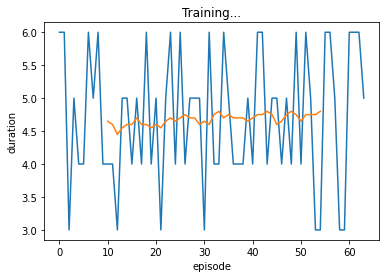

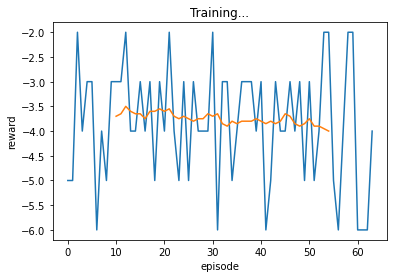

In [7]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword=None, target_list_only=False),
    num_episodes=64
    ))


=========================episode 0 lorry======================
------guess 0 syrah -------
reward -1 done False 
------guess 1 corny -------
reward -1 done False 
------guess 2 dormy -------
reward -1 done False 
------guess 3 borty -------
reward -1 done False 
------guess 4 porky -------
reward -1 done False 
------guess 5 lorry -------
reward 0 done True 
episode 0 finished.  reward 6 -5 6
=========================episode 1 creep======================
------guess 0 stack -------
reward -1 done False 
------guess 1 cumec -------
reward -1 done False 
------guess 2 cozed -------
reward -1 done False 
------guess 3 crier -------
reward -1 done False 
------guess 4 creel -------
reward -1 done False 
------guess 5 creep -------
reward 0 done True 
episode 1 finished.  reward 6 -5 12
=========================episode 2 trash======================
------guess 0 peter -------
reward -1 done False 
------guess 1 garth -------
reward -1 done False 
------guess 2 trash -------
reward 0 done Tr

------guess 1 bitch -------
reward -1 done False 
------guess 2 linch -------
reward -1 done False 
------guess 3 cinch -------
reward -1 done False 
------guess 4 finch -------
reward -1 done False 
------guess 5 pinch -------
reward 0 done True 
episode 25 finished.  reward 6 -5 122
=========================episode 26 turbo======================
------guess 0 wisps -------
reward -1 done False 
------guess 1 beget -------
reward -1 done False 
------guess 2 tubal -------
reward -1 done False 
------guess 3 turbo -------
reward 0 done True 
episode 26 finished.  reward 4 -3 126
=========================episode 27 woozy======================
------guess 0 warst -------
reward -1 done False 
------guess 1 winge -------
reward -1 done False 
------guess 2 woofy -------
reward -1 done False 
------guess 3 woody -------
reward -1 done False 
------guess 4 woozy -------
reward 0 done True 
episode 27 finished.  reward 5 -4 131
=========================episode 28 slave======================


------guess 1 weest -------
reward -1 done False 
------guess 2 heath -------
reward -1 done False 
------guess 3 petal -------
reward -1 done False 
------guess 4 metal -------
reward -1 done False 
------guess 5 fetal -------
reward 0 done True 
episode 51 finished.  reward 6 -5 245
=========================episode 52 index======================
------guess 0 grume -------
reward -1 done False 
------guess 1 bizes -------
reward -1 done False 
------guess 2 inned -------
reward -1 done False 
------guess 3 indew -------
reward -1 done False 
------guess 4 index -------
reward 0 done True 
episode 52 finished.  reward 5 -4 250
=========================episode 53 smoke======================
------guess 0 yukky -------
reward -1 done False 
------guess 1 hooks -------
reward -1 done False 
------guess 2 smoke -------
reward 0 done True 
episode 53 finished.  reward 3 -2 253
=========================episode 54 moist======================
------guess 0 cramp -------
reward -1 done False 


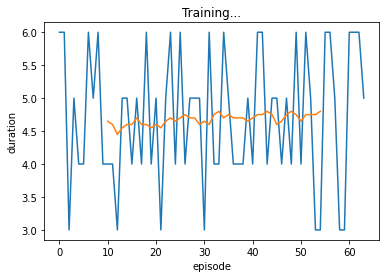

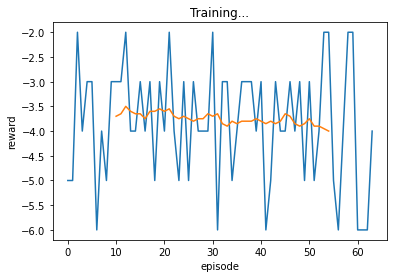

In [8]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword=None, target_list_only=True),
    num_episodes=64
    ))

=========================episode 0 lorry======================
------guess 0 roate -------
reward -1 done False 
------guess 1 morro -------
reward -1 done False 
------guess 2 worry -------
reward -1 done False 
------guess 3 lorry -------
reward 0 done True 
episode 0 finished.  reward 4 -3 4
=========================episode 1 gaily======================
------guess 0 roate -------
reward -1 done False 
------guess 1 wanky -------
reward -1 done False 
------guess 2 faffy -------
reward -1 done False 
------guess 3 mammy -------
reward -1 done False 
------guess 4 daily -------
reward -1 done False 
------guess 5 gaily -------
reward 0 done True 
episode 1 finished.  reward 6 -5 10
=========================episode 2 scrum======================
------guess 0 roate -------
reward -1 done False 
------guess 1 gripy -------
reward -1 done False 
------guess 2 zurfs -------
reward -1 done False 
------guess 3 scrub -------
reward -1 done False 
------guess 4 scrum -------
reward 0 done Tr

------guess 1 ergot -------
reward -1 done False 
------guess 2 twoer -------
reward -1 done False 
------guess 3 ofter -------
reward -1 done False 
------guess 4 other -------
reward 0 done True 
episode 24 finished.  reward 5 -4 122
=========================episode 25 mayor======================
------guess 0 roate -------
reward -1 done False 
------guess 1 organ -------
reward -1 done False 
------guess 2 valor -------
reward -1 done False 
------guess 3 sapor -------
reward -1 done False 
------guess 4 mayor -------
reward 0 done True 
episode 25 finished.  reward 5 -4 127
=========================episode 26 angry======================
------guess 0 roate -------
reward -1 done False 
------guess 1 hardy -------
reward -1 done False 
------guess 2 azury -------
reward -1 done False 
------guess 3 awmry -------
reward -1 done False 
------guess 4 angry -------
reward 0 done True 
episode 26 finished.  reward 5 -4 132
=========================episode 27 await======================


------guess 1 maile -------
reward -1 done False 
------guess 2 false -------
reward -1 done False 
------guess 3 valve -------
reward 0 done True 
episode 50 finished.  reward 4 -3 244
=========================episode 51 shark======================
------guess 0 roate -------
reward -1 done False 
------guess 1 kranz -------
reward -1 done False 
------guess 2 chark -------
reward -1 done False 
------guess 3 shark -------
reward 0 done True 
episode 51 finished.  reward 4 -3 248
=========================episode 52 hunky======================
------guess 0 roate -------
reward -1 done False 
------guess 1 sculp -------
reward -1 done False 
------guess 2 vughy -------
reward -1 done False 
------guess 3 huffy -------
reward -1 done False 
------guess 4 huzzy -------
reward -1 done False 
------guess 5 hubby -------
reward -1 done True 
episode 52 finished.  reward 6 -6 254
=========================episode 53 bloom======================
------guess 0 roate -------
reward -1 done False 

------guess 2 boche -------
reward -1 done False 
------guess 3 pombe -------
reward -1 done False 
------guess 4 noble -------
reward 0 done True 
episode 76 finished.  reward 5 -4 360
=========================episode 77 cache======================
------guess 0 roate -------
reward -1 done False 
------guess 1 alkie -------
reward -1 done False 
------guess 2 hause -------
reward -1 done False 
------guess 3 cache -------
reward 0 done True 
episode 77 finished.  reward 4 -3 364
=========================episode 78 crass======================
------guess 0 roate -------
reward -1 done False 
------guess 1 prays -------
reward -1 done False 
------guess 2 craws -------
reward -1 done False 
------guess 3 crags -------
reward -1 done False 
------guess 4 crams -------
reward -1 done False 
------guess 5 crass -------
reward 0 done True 
episode 78 finished.  reward 6 -5 370
=========================episode 79 fried======================
------guess 0 roate -------
reward -1 done False 


------guess 2 baths -------
reward -1 done False 
------guess 3 gatch -------
reward -1 done False 
------guess 4 natch -------
reward -1 done False 
------guess 5 patch -------
reward -1 done True 
episode 103 finished.  reward 6 -6 481
=========================episode 104 hilly======================
------guess 0 roate -------
reward -1 done False 
------guess 1 whisk -------
reward -1 done False 
------guess 2 ginch -------
reward -1 done False 
------guess 3 hilly -------
reward 0 done True 
episode 104 finished.  reward 4 -3 485
=========================episode 105 exact======================
------guess 0 roate -------
reward -1 done False 
------guess 1 enact -------
reward -1 done False 
------guess 2 exact -------
reward 0 done True 
episode 105 finished.  reward 3 -2 488
=========================episode 106 twang======================
------guess 0 roate -------
reward -1 done False 
------guess 1 thack -------
reward -1 done False 
------guess 2 twals -------
reward -1 done 

------guess 3 afros -------
reward -1 done False 
------guess 4 arroz -------
reward -1 done False 
------guess 5 arrow -------
reward 0 done True 
episode 129 finished.  reward 6 -5 597
=========================episode 130 bible======================
------guess 0 roate -------
reward -1 done False 
------guess 1 wenge -------
reward -1 done False 
------guess 2 umble -------
reward -1 done False 
------guess 3 bible -------
reward 0 done True 
episode 130 finished.  reward 4 -3 601
=========================episode 131 broad======================
------guess 0 roate -------
reward -1 done False 
------guess 1 organ -------
reward -1 done False 
------guess 2 proas -------
reward -1 done False 
------guess 3 broad -------
reward 0 done True 
episode 131 finished.  reward 4 -3 605
=========================episode 132 goofy======================
------guess 0 roate -------
reward -1 done False 
------guess 1 colby -------
reward -1 done False 
------guess 2 gooky -------
reward -1 done F

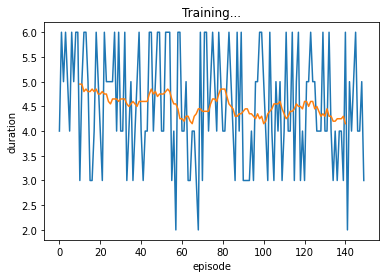

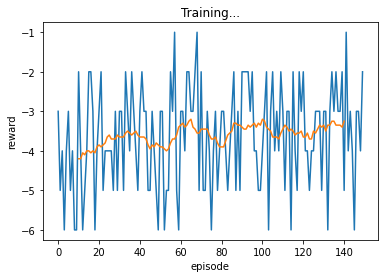

In [12]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword='roate', target_list_only=True),
    num_episodes=150
    ))


=========================episode 0 lorry======================
------guess 0 oater -------
reward -1 done False 
------guess 1 roums -------
reward -1 done False 
------guess 2 porgy -------
reward -1 done False 
------guess 3 dorky -------
reward -1 done False 
------guess 4 lorry -------
reward 0 done True 
episode 0 finished.  reward 5 -4 5
=========================episode 1 marsh======================
------guess 0 oater -------
reward -1 done False 
------guess 1 bajri -------
reward -1 done False 
------guess 2 larns -------
reward -1 done False 
------guess 3 karsy -------
reward -1 done False 
------guess 4 marsh -------
reward 0 done True 
episode 1 finished.  reward 5 -4 10
=========================episode 2 habit======================
------guess 0 oater -------
reward -1 done False 
------guess 1 haunt -------
reward -1 done False 
------guess 2 hadst -------
reward -1 done False 
------guess 3 habit -------
reward 0 done True 
episode 2 finished.  reward 4 -3 14
==========

------guess 5 liver -------
reward -1 done True 
episode 25 finished.  reward 6 -6 131
=========================episode 26 omega======================
------guess 0 oater -------
reward -1 done False 
------guess 1 olpae -------
reward -1 done False 
------guess 2 omega -------
reward 0 done True 
episode 26 finished.  reward 3 -2 134
=========================episode 27 fanny======================
------guess 0 oater -------
reward -1 done False 
------guess 1 gauzy -------
reward -1 done False 
------guess 2 waddy -------
reward -1 done False 
------guess 3 lamby -------
reward -1 done False 
------guess 4 fanny -------
reward 0 done True 
episode 27 finished.  reward 5 -4 139
=========================episode 28 vigil======================
------guess 0 oater -------
reward -1 done False 
------guess 1 bigly -------
reward -1 done False 
------guess 2 sigil -------
reward -1 done False 
------guess 3 vigil -------
reward 0 done True 
episode 28 finished.  reward 4 -3 143
=============

------guess 1 silos -------
reward -1 done False 
------guess 2 hippo -------
reward 0 done True 
episode 53 finished.  reward 3 -2 248
=========================episode 54 fauna======================
------guess 0 oater -------
reward -1 done False 
------guess 1 qapik -------
reward -1 done False 
------guess 2 calyx -------
reward -1 done False 
------guess 3 dawds -------
reward -1 done False 
------guess 4 faugh -------
reward -1 done False 
------guess 5 fauna -------
reward 0 done True 
episode 54 finished.  reward 6 -5 254
=========================episode 55 newer======================
------guess 0 oater -------
reward -1 done False 
------guess 1 spier -------
reward -1 done False 
------guess 2 emeer -------
reward -1 done False 
------guess 3 hexer -------
reward -1 done False 
------guess 4 geyer -------
reward -1 done False 
------guess 5 ceder -------
reward -1 done True 
episode 55 finished.  reward 6 -6 260
=========================episode 56 cabby======================

------guess 1 tawer -------
reward -1 done False 
------guess 2 taxer -------
reward -1 done False 
------guess 3 tamer -------
reward -1 done False 
------guess 4 taser -------
reward -1 done False 
------guess 5 taker -------
reward 0 done True 
episode 78 finished.  reward 6 -5 367
=========================episode 79 wight======================
------guess 0 oater -------
reward -1 done False 
------guess 1 kists -------
reward -1 done False 
------guess 2 pipit -------
reward -1 done False 
------guess 3 night -------
reward -1 done False 
------guess 4 might -------
reward -1 done False 
------guess 5 hight -------
reward -1 done True 
episode 79 finished.  reward 6 -6 373
=========================episode 80 swash======================
------guess 0 oater -------
reward -1 done False 
------guess 1 scamp -------
reward -1 done False 
------guess 2 snags -------
reward -1 done False 
------guess 3 swash -------
reward 0 done True 
episode 80 finished.  reward 4 -3 377
=============

------guess 1 woman -------
reward -1 done False 
------guess 2 allow -------
reward 0 done True 
episode 105 finished.  reward 3 -2 479
=========================episode 106 lapse======================
------guess 0 oater -------
reward -1 done False 
------guess 1 gambe -------
reward -1 done False 
------guess 2 hayle -------
reward -1 done False 
------guess 3 lance -------
reward -1 done False 
------guess 4 lapse -------
reward 0 done True 
episode 106 finished.  reward 5 -4 484
=========================episode 107 cubic======================
------guess 0 oater -------
reward -1 done False 
------guess 1 clink -------
reward -1 done False 
------guess 2 cupid -------
reward -1 done False 
------guess 3 cubic -------
reward 0 done True 
episode 107 finished.  reward 4 -3 488
=========================episode 108 buddy======================
------guess 0 oater -------
reward -1 done False 
------guess 1 kumys -------
reward -1 done False 
------guess 2 gulfy -------
reward -1 done F

------guess 1 twist -------
reward -1 done False 
------guess 2 hints -------
reward -1 done False 
------guess 3 misty -------
reward -1 done False 
------guess 4 silty -------
reward -1 done False 
------guess 5 sixty -------
reward 0 done True 
episode 129 finished.  reward 6 -5 600
=========================episode 130 climb======================
------guess 0 oater -------
reward -1 done False 
------guess 1 whiny -------
reward -1 done False 
------guess 2 climb -------
reward 0 done True 
episode 130 finished.  reward 3 -2 603
=========================episode 131 gumbo======================
------guess 0 oater -------
reward -1 done False 
------guess 1 bobby -------
reward -1 done False 
------guess 2 snobs -------
reward -1 done False 
------guess 3 gumbo -------
reward 0 done True 
episode 131 finished.  reward 4 -3 607
=========================episode 132 trust======================
------guess 0 oater -------
reward -1 done False 
------guess 1 thirl -------
reward -1 done F

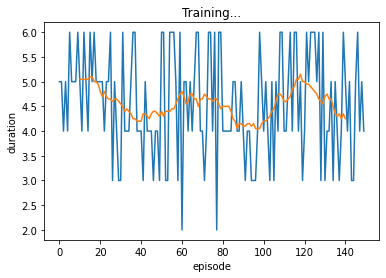

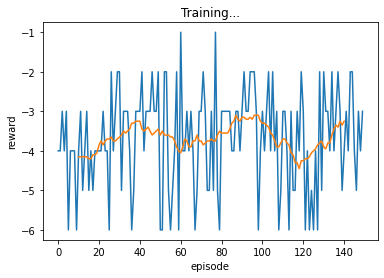

In [11]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword='oater', target_list_only=True),
    num_episodes=150
    ))
